#Problem Statement

---



---



The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

#Data Information

---



---



Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below -

Attribute Information (in order):

CRIM: per capita crime rate by town
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built before 1940
DIS: weighted distances to five Boston employment centres
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per 10,000 dollars
PTRATIO: pupil-teacher ratio by town
LSTAT: %lower status of the population
MEDV: median value of owner-occupied homes in 1000 dollars.



In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/Boston1.csv")

In [3]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 14)

In [5]:
 data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
data.duplicated().sum()

0

In [8]:
data.drop_duplicates()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [10]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#Visualization

In [11]:
import seaborn as sns

<ipython-input-12-26baba5f9db3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ptratio'])


<Axes: xlabel='ptratio', ylabel='Density'>

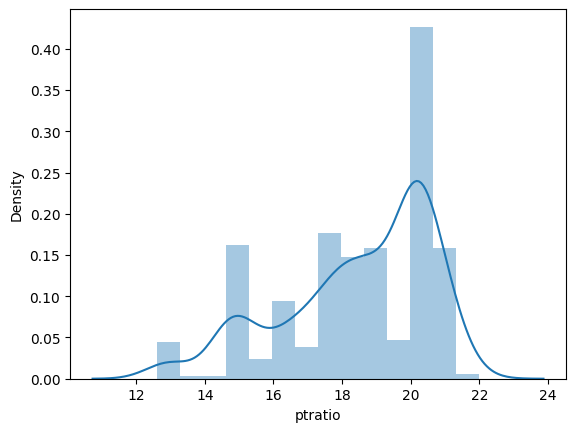

In [12]:
sns.distplot(data['ptratio'])

<ipython-input-13-18b5f4055985>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['black'])


<Axes: xlabel='black', ylabel='Density'>

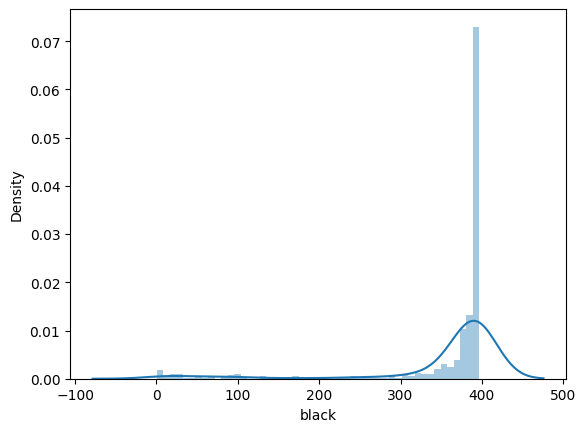

In [13]:
sns.distplot(data['black'])

<ipython-input-14-fd9f2ead17e1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rm'])


<Axes: xlabel='rm', ylabel='Density'>

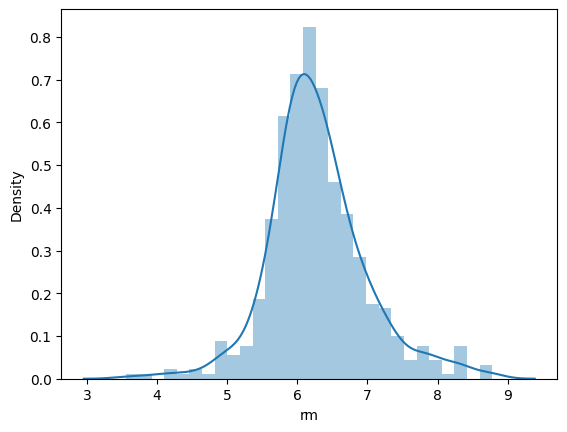

In [14]:
sns.distplot(data['rm'])

In [15]:
data.drop_duplicates()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#feature Selection

---



---



we can select feature by doing data.corr() and by observation we can select feature and target value


In [16]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [17]:
# data.corr()['medv']

or we can select by checking multicolinearity with the help of VIF

#split the dataset

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 80:20 for train and test set.

In [18]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:]
import statsmodels.api as sm
x = sm.add_constant(x)

In [19]:
 # Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 14)
(102, 14)
(404, 1)
(102, 1)


In [21]:
x.size, y.size

(7084, 506)

In [22]:
y_train.tail()

,medv
438,8.4
501,22.4
126,15.7
348,24.5
382,11.3


#check for multicolinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

* Variance Inflation factor: Variance inflation factors measures the inflation in the variances of the regression parameter estimates due to collinearity that exists among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the predictor variables in the model.

* Thumb Rule: If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables, and hence the variance of β̂k is not inflated at all. Whereas if **VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.**

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif


print(checking_vif(x_train))

    feature         VIF
0     const  588.347806
1      crim    1.751458
2        zn    2.322155
3     indus    3.885346
4      chas    1.078092
5       nox    4.541361
6        rm    1.972225
7       age    3.131291
8       dis    3.970509
9       rad    7.302584
10      tax    8.569938
11  ptratio    1.764242
12    black    1.314918
13    lstat    3.011639


Dropping the column 'TAX' from the training data and checking if multicollinearity is removed


In [25]:
x_train = x_train.drop(columns = 'tax')
x_test = x_test.drop(columns = 'tax')
print(checking_vif(x_train))

    feature         VIF
0     const  578.623581
1      crim    1.751089
2        zn    2.172891
3     indus    3.135300
4      chas    1.066131
5       nox    4.518474
6        rm    1.953370
7       age    3.130377
8       dis    3.969891
9       rad    2.763951
10  ptratio    1.756560
11    black    1.314045
12    lstat    3.009610


# model bulding part


In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
print(regressor.intercept_)

[30.5548932]


In [28]:
print(regressor.coef_)

[[ 0.00000000e+00 -1.12365712e-01  3.10186375e-02 -5.55257975e-02
   2.32914377e+00 -1.58003169e+01  4.08401093e+00 -1.11691503e-03
  -1.36875820e+00  1.08032289e-01 -9.02512755e-01  8.44570650e-03
  -5.19725701e-01]]


In [29]:
y_pred = regressor.predict(x_test)
y_pred

array([[20.39154196],
       [15.15889498],
       [33.59867919],
       [17.342576  ],
       [18.60478287],
       [23.1850999 ],
       [34.06436892],
       [28.04881763],
       [20.35038931],
       [16.31012748],
       [17.52582482],
       [27.08492336],
       [16.11452604],
       [32.19360963],
       [14.50778944],
       [30.60009678],
       [18.72399218],
       [22.63719938],
       [29.81603161],
       [17.46864119],
       [24.73194439],
       [ 5.28037657],
       [24.13462631],
       [20.49121314],
       [27.82981153],
       [43.07766301],
       [26.2764763 ],
       [14.9666299 ],
       [20.58774356],
       [23.69806721],
       [13.38715858],
       [13.29915804],
       [20.54143529],
       [16.40163228],
       [21.29211634],
       [15.15904668],
       [30.73108223],
       [16.94107846],
       [13.01379491],
       [39.95801886],
       [17.8707855 ],
       [22.67095661],
       [13.85042458],
       [37.83705895],
       [34.23890929],
       [18

In [30]:
y_pred =pd.DataFrame(y_pred,columns=['predicted'])

In [31]:
 y_pred.isna().sum()
#predicted value

predicted    0
dtype: int64

In [32]:
Prediction = pd.DataFrame(columns=['Actual','Predicted'])
Prediction['Actual'] = y_test
Prediction['Predicted'] = y_pred
Prediction.describe()

,Actual,Predicted
count,102.000000,24.000000
mean,22.609804,24.347376
std,10.108848,8.136982
min,7.400000,10.149072
25%,15.600000,19.100220
50%,20.600000,21.964658
75%,26.250000,30.728717
max,50.000000,39.958019


model performance


In [33]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.3955256718981315
Mean Squared Error: 24.20874042883945
Root Mean Squared Error: 4.920237842710396


In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)*100

76.07523757875563

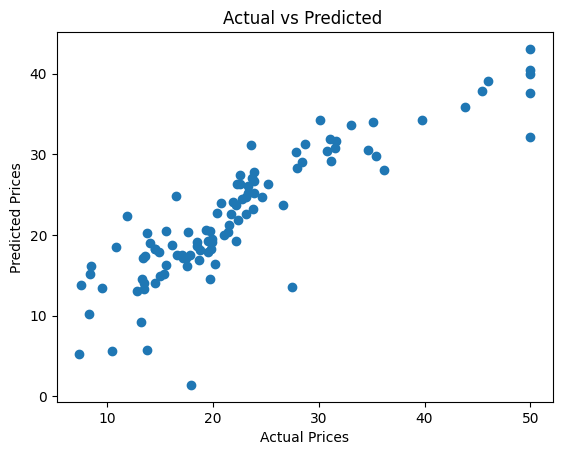

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted ")
plt.show()
